# Introduction

This notebook is my midterm project as part of the Machine Learning Zoomcamp by Alexey Grigorev.

The content of the notebook is structured as such: 

[1. Define the problem](#section-1)

[2. Undertake EDA](#section-2)  

[3. Build the model](#section-3)  

[4. Transform to a Web app](#section-4)  

[5. Deploy with Docker](#section-5)  

[6. Deploy in the Cloud](#section-6)  

<div style="text-align:center">

![Remote GIF](https://media2.giphy.com/media/LpkBAUDg53FI8xLmg1/giphy.gif)

</div>



<a id="section-1"></a>
# [1. Define the problem](#section-1)
Why do people resign? This can be important from the employers' perspective as well as the employees': 
* The HR department may want to estimate their turnover rate based on employee details and characterstics. They may want to know if a certain employee with an important and sensitive role may resign. 
* From an employee's perspective, they may be struggling with the decision to resign and this could act as a decision support tool. They can insert their details and see what the ML model's outcome is. 
* I was very curious aboud finding out why people resign. I also thought it would be interesting and useful to build a Machine Learning Model that allows users to input their details and find out if they are likely to resign!! 
* The dataset I used can be found here: https://www.kaggle.com/code/paramarthasengupta/hr-analytics-prediction-why-do-people-resign/input

<a id="section-2"></a>
# [2. Undertake EDA](#section-2)

Explorative Data Analysis is used to develop my understanding of the data. This will allow me to apply the most appropriate data cleaning and preparation tools as well as gain an understanding of the different features, their relationship with each other as well as their impact on the target varibale: Attrition



In [115]:
#import libraries
import pandas as pd
import numpy as np
import string
from IPython.display import display #provides a nice display of dataframes
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score #to quantify how much we learn about one variable from  another
from sklearn.feature_extraction import DictVectorizer #to encode our raw data into ML model ready data
from sklearn.model_selection import train_test_split 
from sklearn.metrics import auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.tree import export_text #allows to which features are decision trees using to split the data
import pickle
from sklearn.metrics import accuracy_score
from IPython.display import clear_output #to clear saved output from using %%capture





In [116]:
df_original = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df = df_original.copy()

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are 1,470 entries. Each entry has 26 int64 features and 9 object ones. Let's check for null entries. 

In [118]:
df.isnull().sum().sum()

0

That's great as the dataset is already small. 

Let's inspect the data

In [119]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Let us transform some of the variables from numerical to categorical to understand the signficance of the numbers used.

In [120]:
Education = {1: 'Below College',
            2: 'College',
            3: 'Bachelor',
            4: 'Master',
            5: 'Doctor'
            }

EnvironmentSatisfaction = {
1: 'Low',
2: 'Medium',
3: 'High',
4: 'Very High'
}

JobInvolvement = {
1: 'Low',
2: 'Medium',
3: 'High',
4: 'Very High',
}


JobSatisfaction = {
1: 'Low',
2: 'Medium',
3: 'High',
4: 'Very High',
}


PerformanceRating = {
1: 'Low',
2: 'Good',
3: 'Excellent',
4: 'Outstanding'
}

RelationshipSatisfaction = {
1: 'Low',
2: 'Medium',
3: 'High',
4: 'Very High'
}

WorkLifeBalance = {
1: 'Bad',
2: 'Good',
3: 'Better',
4: 'Best'
}

mapped_features = [Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance]

mapped_features_names = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']

mapped_features = zip(mapped_features_names, mapped_features)
for name,value in mapped_features:
    df[name] = df[name].map(value)

In [121]:
object_columns = list(df.columns[df.dtypes == 'object'].values)
numerical_columns = list(df.columns[df.dtypes != 'object'].values)

In [122]:
df[object_columns] = df[object_columns].apply(lambda x: x.str.lower().str.replace(' ','_'))

Let's check how many unique values the object features have

In [123]:
df[object_columns].nunique()

Attrition                   2
BusinessTravel              3
Department                  3
Education                   5
EducationField              6
EnvironmentSatisfaction     4
Gender                      2
JobInvolvement              4
JobRole                     9
JobSatisfaction             4
MaritalStatus               3
Over18                      1
OverTime                    2
PerformanceRating           2
RelationshipSatisfaction    4
WorkLifeBalance             4
dtype: int64

In [124]:
df[df['Over18'] != 'y']

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


Everyone in the dataset is over 18 so let us remove this column.

In [125]:
df.drop(columns=['Over18'], inplace=True)

In [126]:
index_over_18 = object_columns.index('Over18')
del object_columns[index_over_18]
object_columns

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance']

## 2.1 Feature importance

Let's explore the features' impact on the target variable. This is for categorical variables.

In [127]:
Attrition = {'yes': 1,
             'no': 0}

df['Attrition'] = df['Attrition'].map(Attrition)
global_attrition = df.Attrition.mean()

I will compare the avearge attrition grouped by feature. This will tell me if the attrition for a certain feature value is higher or lower then the global average. If the feature value average attrition is higher than the global average, then this feature value has an important impact on attrition. By calculating the ratio, we can get a percetange estimate of this importance, i.e. if the risk is 1.4, then for individuals with this feature value are 40% more likely to resign than the global population.

In [128]:
df_diff_risk = {}

for c in object_columns:
    grouped_df = df.groupby(c)['Attrition'].agg(['mean'])
    grouped_df['risk'] = grouped_df/global_attrition
    display(grouped_df)
    print()
    print()
    



,mean,risk
Attrition,,
0,0.0,0.000000
1,1.0,6.202532


,mean,risk
BusinessTravel,,
non-travel,0.080000,0.496203
travel_frequently,0.249097,1.545035
travel_rarely,0.149569,0.927704


,mean,risk
Department,,
human_resources,0.190476,1.181435
research_&_development,0.138398,0.858415
sales,0.206278,1.279446


,mean,risk
Education,,
bachelor,0.173077,1.073515
below_college,0.182353,1.131050
college,0.156028,0.967771
doctor,0.104167,0.646097
master,0.145729,0.903887


,mean,risk
EducationField,,
human_resources,0.259259,1.608064
life_sciences,0.146865,0.910933
marketing,0.220126,1.365337
medical,0.135776,0.842154
other,0.134146,0.832047
technical_degree,0.242424,1.503644


,mean,risk
EnvironmentSatisfaction,,
high,0.136865,0.848912
low,0.253521,1.572473
medium,0.149826,0.929299
very_high,0.134529,0.834421


,mean,risk
Gender,,
female,0.147959,0.917722
male,0.170068,1.054852


,mean,risk
JobInvolvement,,
high,0.144009,0.893222
low,0.337349,2.092420
medium,0.189333,1.174346
very_high,0.090278,0.559951


,mean,risk
JobRole,,
healthcare_representative,0.068702,0.426128
human_resources,0.230769,1.431353
laboratory_technician,0.239382,1.484776
manager,0.049020,0.304046
manufacturing_director,0.068966,0.427761
research_director,0.025000,0.155063
research_scientist,0.160959,0.998353
sales_executive,0.174847,1.084492
sales_representative,0.397590,2.466067


,mean,risk
JobSatisfaction,,
high,0.165158,1.024400
low,0.228374,1.416495
medium,0.164286,1.018987
very_high,0.113290,0.702683


,mean,risk
MaritalStatus,,
divorced,0.100917,0.625944
married,0.124814,0.774164
single,0.255319,1.583625


,mean,risk
OverTime,,
no,0.104364,0.647323
yes,0.305288,1.893561


,mean,risk
PerformanceRating,,
excellent,0.160772,0.997192
outstanding,0.163717,1.015459


,mean,risk
RelationshipSatisfaction,,
high,0.154684,0.959433
low,0.206522,1.280958
medium,0.148515,0.921168
very_high,0.148148,0.918894


,mean,risk
WorkLifeBalance,,
bad,0.312500,1.938291
best,0.176471,1.094564
better,0.142217,0.882107
good,0.168605,1.045776


After examining the numbers, it seem Gender and PerformanceRating does not have an impact on Attrition. All the other remaining features do. A more detailed analysis is given below:

*  BuisnessTravel - Travel frequently have a higher attrition rate than the global. the others are lower than the global

*  Department: human resources and sales seem to have a higher attrition rate than research&development

*  Education - people with below_college have the highest attrition rate (higher than global) - PhDs have the lowest

*  EducationField - human_resources, marketing and technical degree are 60, 36 ad 50% more likely to leave than average

*  EnvironmentSatisfaction - low satisfaction is 57% more likely to leave than global average

*  Gender - slight difference, but males are more likely to resign than females

*  JobInvolvement - low is twice more likely to leave than average

*  JobRole - sales_representative are 140% more likely to resign than average

*  JobSatisfaction - low is 40% more likely to leave

*  MaritalStatus - single is 58% more likely to leave

*  OverTime - those who work overtime are 89% more likely to leave

*  PerformanceRating - does not seem to have an impact - very close to average
* RelationshipSatisfaction - low is 28% more likely to leave than average
* WorkLifeBalance - bad is 93% more likely to leave





## 2.2 Mutual Information

Let us see if the results of the mutual information matches our previous findings. I expect that Gender and PerformanceRating have a lower mutual information score than the remaining features. I also expect JobRole, OverTime and WorkLifeBalance to be on top of that list.
This time we can also include numerical features.

In [129]:
df_features = df.drop('Attrition', axis = 1)

In [130]:
object_features = list(df_features.columns[df_features.dtypes == 'object'].values)
numerical_features = list(df_features.columns[df_features.dtypes != 'object'].values)

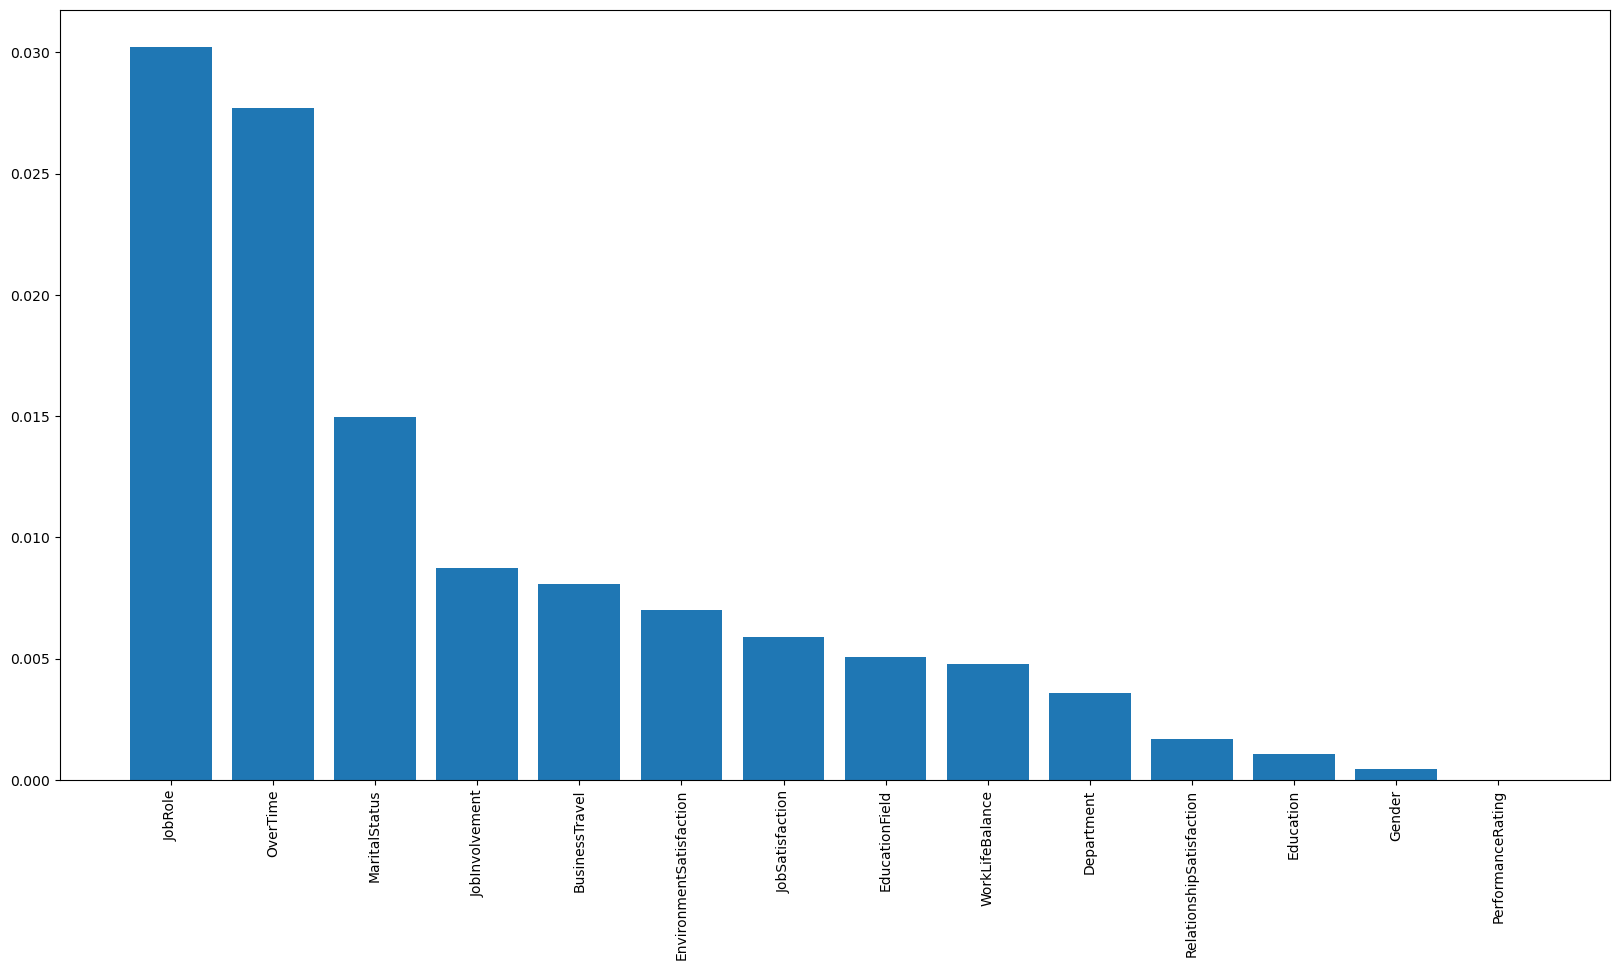

In [131]:
mi_scores = df_features[object_features].apply(lambda x: mutual_info_score(x, df.Attrition))
mi_scores = mi_scores.sort_values(ascending = False)
plt.figure(figsize=(20,10))
plt.bar(mi_scores.index, mi_scores.values)
c = plt.xticks(rotation = 90)

* JobRole and OverTime came in as I had expected. 
* I was surprised by WorkLifeBalance coming in 9th place. However, checking back its feature importance table, only the 'bad' value had a very high impact on average attrition. Its other 3 values were very close to the global average. So maybe that reduces its mutual information score. 
* Whereas when I consider the feature importance table for Marital Status, a person is 30-40% less likely to resign if they are divorced or married and 58% likley to resign if they are single! So i beleive that give it its high mutual information score.

In terms of categorical features, JobRole, OverTime and MaritalStatus seem to tell us the most about Attrition. 

Let's have a look at numerical features too! 

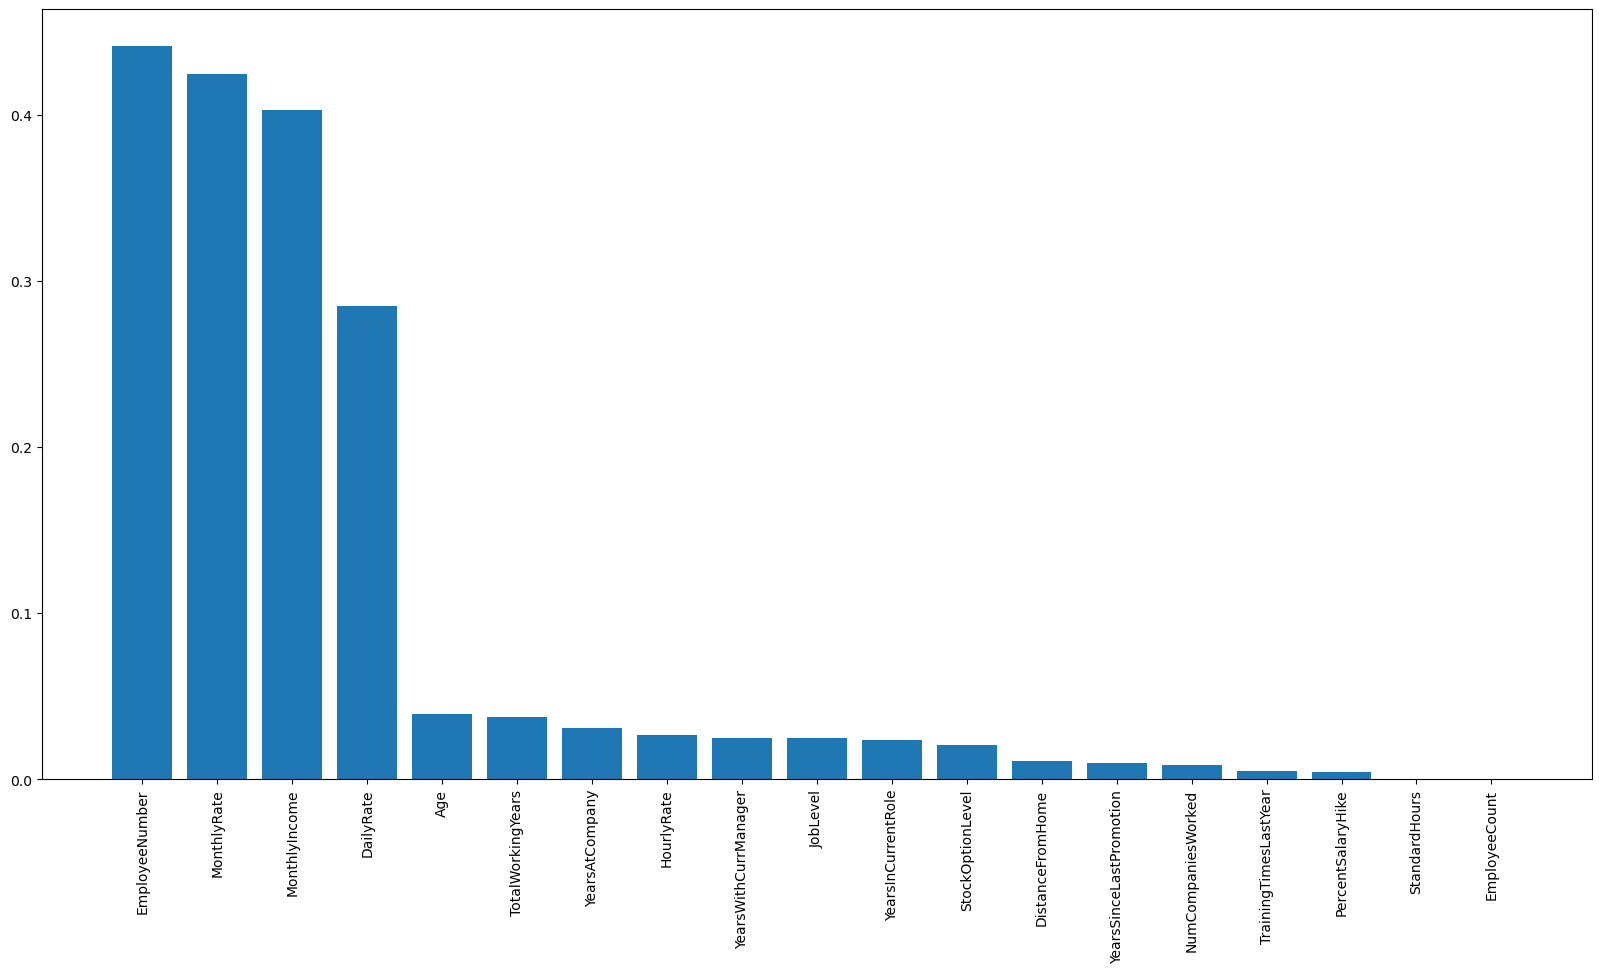

In [132]:
mi_scores = df_features[numerical_features].apply(lambda x: mutual_info_score(x, df.Attrition))
mi_scores = mi_scores.sort_values(ascending = False)
plt.figure(figsize=(20,10))
plt.bar(mi_scores.index, mi_scores.values)
c = plt.xticks(rotation = 90)

* That says a lot. Already by the value of the MI score, the first four features have an MI score between c.a. 0.28 and 0.45. That is more than 10 times the highest MI score for the categorical features. 
* However, the EmployeeNumber seems odd to me. It seems to be some sort of an index as it is linearly increasing. However, it reaches a max value of 2,068 while we have 1,047 entries. I will keep an eye on it, but i am not convinced it is a valuable feature. I will test it when building the classification model. 

For numerical features, EmployeeNumber, MonthlyRate and MonthlyIncome seem to tell us the most about Attrition. Although for training, maybe these three features can be combined in one! It is actually pretty hard to interpret some of the numerical variables and i cannot find more information about the dataset! 

In [133]:
df[['MonthlyRate','MonthlyIncome','DailyRate']]

,MonthlyRate,MonthlyIncome,DailyRate
0,19479,5993,1102
1,24907,5130,279
2,2396,2090,1373
3,23159,2909,1392
4,16632,3468,591
...,...,...,...
1465,12290,2571,884
1466,21457,9991,613
1467,5174,6142,155
1468,13243,5390,1023


In [134]:
df_features[numerical_features].corrwith(df.Attrition).sort_values(ascending=False)

DistanceFromHome           0.077924
NumCompaniesWorked         0.043494
MonthlyRate                0.015170
HourlyRate                -0.006846
EmployeeNumber            -0.010577
PercentSalaryHike         -0.013478
YearsSinceLastPromotion   -0.033019
DailyRate                 -0.056652
TrainingTimesLastYear     -0.059478
YearsAtCompany            -0.134392
StockOptionLevel          -0.137145
YearsWithCurrManager      -0.156199
Age                       -0.159205
MonthlyIncome             -0.159840
YearsInCurrentRole        -0.160545
JobLevel                  -0.169105
TotalWorkingYears         -0.171063
EmployeeCount                   NaN
StandardHours                   NaN
dtype: float64

The 8 bottom features there seem the only ones to have a signficant correlation value and they are all negative. So any of these features go up, the attrition may go down.  

EmployeeCount and StandardHours have a single unique value. So let us delete them. 

In [135]:
df.EmployeeCount.unique()
df.StandardHours.unique()
df_features.drop(['StandardHours','EmployeeCount'],axis = 1, inplace=True)

In [136]:
object_features = list(df_features.columns[df_features.dtypes == 'object'].values)
numerical_features = list(df_features.columns[df_features.dtypes != 'object'].values)

<a id="section-3"></a>
# [3. Build the Model](#section-3)

This is a classification problem. The dataset has 31 features and an attrition (resigned) column. We will train classification models (logistic regression, decision trees and ensemble learning) to predict the attrition based on the 34 features. 

First, i will split the data into a training, validation and test dataset. After training and testing their performance on a validation dataset, I will choose the xgb_modelwith the best performance. I will then train and test the chosen model on the full dataset. 

Let's start with some data preparation. We need to transform our dataframe into a form that ML models can digest! 

## 3.1 Data transformation/encoding

Here we will use methods from scikit-learn that allow us to encode data into machine understandable format. We will go from 'Married' and 'Divorced' to numbers. But first let us split the data into training, validation and testing. 

In [137]:
y = df.Attrition #our target variable

In [138]:
df_train,  df_val_test,y_train, y_val_test = train_test_split(df_features,y, test_size= 0.4, random_state=1)
df_val, df_test,y_val, y_test = train_test_split(df_val_test, y_val_test, test_size=0.5, random_state=1)


In [139]:
X_train = df_train.to_dict(orient='records')
X_val = df_val.to_dict(orient='records')

In [140]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(X_train)
X_val = dv.transform(X_val)

## 3.2 Model selection

Here we are going to build the following ML models:
* Logistic regression
* Decision tree
* Random Forest
* XGBOOST

We will hypertune each model by train  on the train dataset and evaluating on the validation test. The best performing model (on the validation dataset) will be tested on the test dataset. If the performance is similar to the validation process, then it will be selected. 

In [141]:
df_model_auc = {}

**Logistic Regression**

In [142]:
C = [0.001, 0.01, 0.1, 1]
LR_auc_score = []
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
for c in C:
    LR_model = LogisticRegression(C=c, max_iter=1000)
    LR_model.fit(X_train_scaled, y_train)
    LR_y_val_pred = LR_model.predict(X_val_scaled)
    roc = roc_auc_score(y_val,LR_y_val_pred)
    LR_auc_score.append(roc)
    print(f'C = {c} -> roc = {roc:.3f}')

C = 0.001 -> roc = 0.500
C = 0.01 -> roc = 0.540
C = 0.1 -> roc = 0.658
C = 1 -> roc = 0.682


In [143]:
df_model_auc['logistic_regression'] = LR_auc_score[-1]

Even the best performance does not have a 'good' score. This is due to the size of the dataset. We will still go with C=1.0 for the Logistic Regression model.

**Decision Tree**

In [144]:
DT_auc_score = []
Depth = [4, 5, 6]
min_sample_leaf = [1, 5, 10, 15, 20, 500, 100, 200]
for depth in Depth:
    for s in min_sample_leaf:
        DT_model = DecisionTreeClassifier(max_depth = depth, min_samples_leaf=s, random_state=1)
        DT_model.fit(X_train, y_train)
        DT_y_val_pred = DT_model.predict(X_val)
        roc = roc_auc_score(y_val, DT_y_val_pred)
        DT_auc_score.append((depth, s,roc))
        # print(f'Depth = {depth}, min_sample_leaf = {s} -> roc = {roc:.3f}')


In [145]:
DT_df_roc = pd.DataFrame(DT_auc_score, columns= ['depth','min_sample_leaf','roc'])
DT_df_roc = DT_df_roc.pivot(index = 'min_sample_leaf', columns='depth')

DT_df_roc

roc                    
depth                   4         5         6
min_sample_leaf                              
1                0.559262  0.616967  0.581066
5                0.557459  0.575164  0.559262
10               0.587459  0.587213  0.593115
15               0.585656  0.579508  0.579508
20               0.581557  0.581557  0.581557
100              0.500000  0.500000  0.500000
200              0.500000  0.500000  0.500000
500              0.500000  0.500000  0.500000

A depth of 5 and a min_sample_leaf of 1 provides the highest roc of 0.61!

In [146]:
DT_model = DecisionTreeClassifier(max_depth = 5, min_samples_leaf=1)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [147]:
df_model_auc['decision_tree'] = DT_df_roc.max().max()

In [148]:
print(export_text(DT_model, feature_names=list(dv.get_feature_names_out())))

|--- OverTime=yes <= 0.50
|   |--- TotalWorkingYears <= 2.50
|   |   |--- JobRole=research_scientist <= 0.50
|   |   |   |--- HourlyRate <= 58.50
|   |   |   |   |--- Age <= 34.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  34.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- HourlyRate >  58.50
|   |   |   |   |--- HourlyRate <= 83.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- HourlyRate >  83.50
|   |   |   |   |   |--- class: 1
|   |   |--- JobRole=research_scientist >  0.50
|   |   |   |--- class: 0
|   |--- TotalWorkingYears >  2.50
|   |   |--- EnvironmentSatisfaction=low <= 0.50
|   |   |   |--- YearsAtCompany <= 30.00
|   |   |   |   |--- MonthlyIncome <= 2087.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- MonthlyIncome >  2087.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- YearsAtCompany >  30.00
|   |   |   |   |--- class: 1
|   |   |--- EnvironmentSatisfaction=low >  0.50
|   |   |   |--- EducationField=marketing <= 0.50
| 

There we go, OverTime and MonthlyIncome appear again as top features! 

Right! So far, LogisticRegression is winning at roc = 0.682.

On to **Random Forests!** 

In [149]:
RF_auc_score = []
n_estimator = list(np.linspace(1,10,10, dtype = 'int'))
Depth = [7,8,9,10,11]
for depth in Depth:
    for n in n_estimator:
        RF_model = RandomForestClassifier(max_depth=depth, n_estimators = n, random_state=1)
        RF_model.fit(X_train, y_train)
        RF_y_val_pred = RF_model.predict(X_val)
        roc = roc_auc_score(y_val, RF_y_val_pred)
        RF_auc_score.append((depth,n,roc))
        # print(f'Depth = {depth}, min_sample_leaf = {s} -> roc = {roc:.3f}')


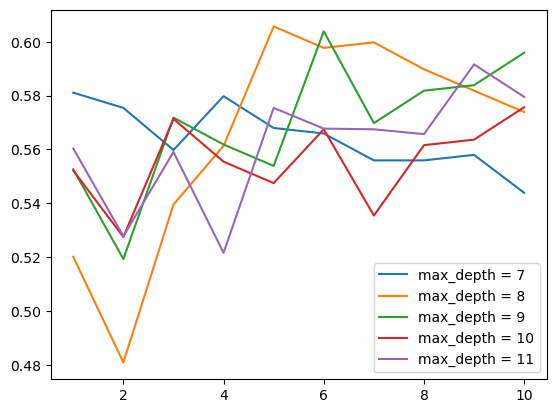

In [150]:
df_RF_auc_score = pd.DataFrame(RF_auc_score, columns=['depth','n_estimator','roc'])
for d in Depth:
    df_plot = df_RF_auc_score[df_RF_auc_score.depth==d]
    plt.plot(df_plot.n_estimator, df_plot.roc, label = f'max_depth = {d}')
plt.legend()

Let's go with max_depth = 8

In [151]:
max_depth = 8
RF_auc_score = []
min_sample_leaf = list(np.linspace(1,10,10, dtype = 'int'))

for s in min_sample_leaf:
    for n in n_estimator:
        RF_model = RandomForestClassifier(n_estimators = n, max_depth = max_depth, min_samples_leaf=s, random_state=1)
        RF_model.fit(X_train, y_train)
        RF_y_val_pred = RF_model.predict(X_val)
        roc = roc_auc_score(y_val, RF_y_val_pred)
        RF_auc_score.append((s,n,roc))
    # print(f'Depth = {depth}, min_sample_leaf = {s} -> roc = {roc:.3f}')


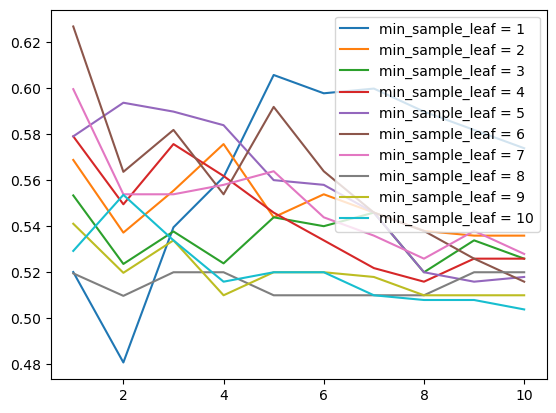

In [152]:
df_RF_auc_score = pd.DataFrame(RF_auc_score, columns=['min_sample_leaf','n_estimator','roc'])
for s in min_sample_leaf:
    df_plot = df_RF_auc_score[df_RF_auc_score.min_sample_leaf==s]
    plt.plot(df_plot.n_estimator, df_plot.roc, label = f'min_sample_leaf = {s}')
plt.legend()

In [153]:
max_depth = 8
min_sample_leaf = 1
n_estimator = 5
RF_model = RandomForestClassifier(n_estimators = n_estimator, max_depth = max_depth, min_samples_leaf=min_sample_leaf, random_state=1)
RF_model.fit(X_train, y_train)
RF_y_val_pred = RF_model.predict(X_val)
RF_roc = roc_auc_score(y_val, RF_y_val_pred)
print(RF_roc)

0.605655737704918


In [154]:
df_model_auc['random_forest'] = RF_roc

As expected, Random forest performs worst than decision tree due the small size of the dataset. 

**XGBOOST** is the final candidate to beat Logistic Regression! Let's see!

In [155]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label= y_train, feature_names=features)
dval = xgb.DMatrix(X_val, y_val, feature_names=features)

In [156]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

eta tuning

In [157]:
%%capture output
num_boost_round=300
verbose_eval=2
watchlist = [(dtrain, 'train'), (dval, 'val')]
eta_list = [0.1,0.2,0.3]
for eta in eta_list:
    xgb_params = {
        'eta': eta, 
        'max_depth': 6,
        'min_child_weight': 1,
        
        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=num_boost_round,
                verbose_eval=verbose_eval,
                evals=watchlist)
df_results = parse_xgb_output(output)
   
    # plt.legend()


In [158]:
def auc_plot(df_results, output_loop,xgb_param_name, xgb_param_list):
    for i in range(1,len(xgb_param_list)+1):
        df_plot = df_results.iloc[(i-1)*output_loop+i-1:(i-1)*output_loop+i+output_loop]
        plt.plot(df_plot.num_iter, df_plot.val_auc,'-', label = f'{xgb_param_name} = {xgb_param_list[i-1]}')
    plt.legend()

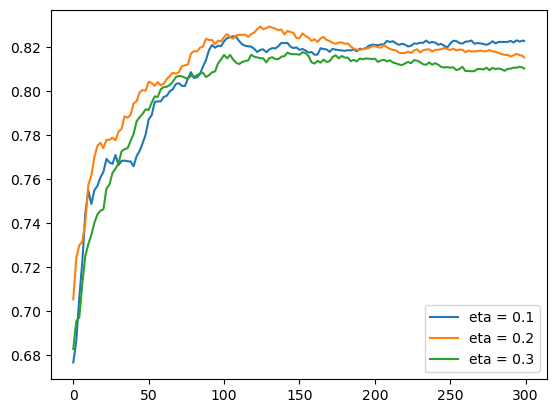

In [159]:
output_loop = int(num_boost_round/verbose_eval) # the number of rows in each iteration corresponding to a xgb_parameter value
auc_plot(df_results, output_loop, 'eta',eta_list)

eta = 0.1 is shown the best performance. 

In [160]:
del df_results
clear_output()

In [161]:
%%capture output

num_boost_round=300
verbose_eval=2
watchlist = [(dtrain, 'train'), (dval, 'val')]
max_depth_list = [5,10,15]
for max_depth in max_depth_list:
    xgb_params = {
        'eta': 0.1, 
        'max_depth': max_depth,
        'min_child_weight': 1,
        
        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=num_boost_round,
                verbose_eval=verbose_eval,
                evals=watchlist)
df_results = parse_xgb_output(output)
   
    # plt.legend()


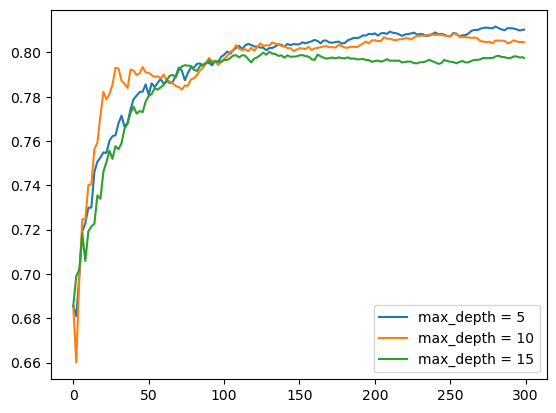

In [162]:
   
auc_plot(df_results, output_loop,'max_depth', max_depth_list)

max_depth = 5

In [163]:
del df_results
clear_output()

In [164]:
%%capture output

watchlist = [(dtrain, 'train'), (dval, 'val')]
min_child_list = [5,10,15]
for min_child in min_child_list:
    xgb_params = {
        'eta': 0.1, 
        'max_depth': 5,
        'min_child_weight': min_child,
        
        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=num_boost_round,
                verbose_eval=verbose_eval,
                evals=watchlist)
df_results = parse_xgb_output(output)
   
    # plt.legend()


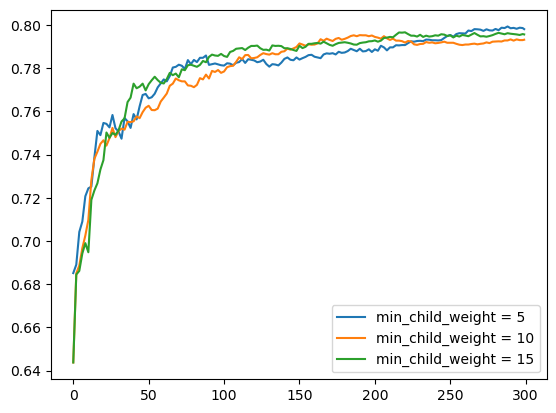

In [165]:
   
auc_plot(df_results, output_loop,'min_child_weight', min_child_list)

min_child_weight = 5

In [166]:

xgb_params = {
    'eta': 0.1, 
    'max_depth': 5,
    'min_child_weight': 5,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=200,
            verbose_eval=5)

In [167]:
xg_y_pred = xgb_model.predict(dval)
df_model_auc['xg_boost'] = roc_auc_score(y_val,xg_y_pred)

In [168]:
pd.DataFrame(df_model_auc, index =['AUC'])

,logistic_regression,decision_tree,random_forest,xg_boost
AUC,0.681557,0.616967,0.605656,0.821148


It is a very easy decision. XGBoost outperforms the others. 

So let us test it on the test dataset to see if it is aligned or close to the auc score we got on the validation 

In [169]:
X_test = df_test.to_dict(orient='records')
X_test = dv.transform(X_test)
dtest = xgb.DMatrix(X_test, label = y_test, feature_names=features)
xg_y_pred = xgb_model.predict(dtest)
roc_auc_score(y_test,xg_y_pred)

0.7786077558804831

Now let's split the data into just training (80%) and testing (20%) and retrain/retest. 

In [170]:
df_train,df_test, y_train, y_test = train_test_split(df_features, y, test_size=0.2, random_state=1)
dv = DictVectorizer(sparse=False)
X_train = df_train.to_dict(orient='records')
X_train = dv.fit_transform(X_train)
X_test = df_test.to_dict(orient='records')
X_test = dv.transform(X_test)

In [171]:
dtrain = xgb.DMatrix(X_train,label = y_train,feature_names=features)
dtest = xgb.DMatrix(X_test,label = y_test, feature_names=features)
xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=200,
            verbose_eval=5)

In [114]:
y_test_predict= xgb_model.predict(dtest)
roc_auc_score(y_test,y_test_predict)

0.8170660432495617

In [176]:
with open('xgb_model_eta_depth_child_0.2_5_5','wb') as f:
    pickle.dump((dv,xgb_model),f)

In [177]:
with open('xgb_model_eta_depth_child_0.2_5_5','rb') as f:
    load_dv, load_model = pickle.load(f)

In [178]:
y_test_predict = (y_test_predict>0.5).astype('int')

accuracy_score(y_test,y_test_predict)

0.8537414965986394

In [232]:
d_employee = xgb.DMatrix([X_test[0]], feature_names=features)
resign_prob = xgb_model.predict(d_employee)
resign_prob

array([0.04163079], dtype=float32)

In [229]:
g = json.loads(df_test.iloc[0].to_json())
g = json.dumps(g, indent = 4)

In [230]:
print(g)

{
    "Age": 37,
    "BusinessTravel": "travel_rarely",
    "DailyRate": 370,
    "Department": "research_&_development",
    "DistanceFromHome": 10,
    "Education": "master",
    "EducationField": "medical",
    "EmployeeNumber": 1809,
    "EnvironmentSatisfaction": "very_high",
    "Gender": "male",
    "HourlyRate": 58,
    "JobInvolvement": "high",
    "JobLevel": 2,
    "JobRole": "manufacturing_director",
    "JobSatisfaction": "low",
    "MaritalStatus": "single",
    "MonthlyIncome": 4213,
    "MonthlyRate": 4992,
    "NumCompaniesWorked": 1,
    "OverTime": "no",
    "PercentSalaryHike": 15,
    "PerformanceRating": "excellent",
    "RelationshipSatisfaction": "medium",
    "StockOptionLevel": 0,
    "TotalWorkingYears": 10,
    "TrainingTimesLastYear": 4,
    "WorkLifeBalance": "bad",
    "YearsAtCompany": 10,
    "YearsInCurrentRole": 3,
    "YearsSinceLastPromotion": 0,
    "YearsWithCurrManager": 8
}


* **Web app**: I will use flask to create an app that allows users to enter their details and find out the outcome: Resign/Not to resign



* **Docker**: I will deploy the web app locally with Docker



* **Cloud**: I will deploy the web on the cloud using AWS cloud services